In [1]:
# import the necessary packages
from imutils import paths
import numpy as np

import pickle
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time
import tensorflow as tf


from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

tf.keras.backend.clear_session()

In [2]:
img_width, img_height = 224, 224
#base_model = tf.keras.applications.MobileNetV2(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)
#img_width, img_height =  
#base_model = tf.keras.applications.NASNetMobile(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)
base_model = tf.keras.applications.Xception(input_shape=(img_height, img_width, 3), weights='imagenet', include_top=False)

x = base_model.output
x  = tf.keras.layers.GlobalAveragePooling2D()(x)
base_model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

#

# Set the directory you want to start from
rootDir = '.'
for dirName, subdirList, fileList in os.walk(rootDir):
    print('Found directory: %s' % dirName)
    for fname in fileList:
        print('\t%s' % fname)

Found directory: .
	.gitignore
	Train_Classifier_AllDeep.ipynb
	Train_Classifier_DEEP_SVC.ipynb
Found directory: ./Data_set_1
Found directory: ./Data_set_1/dataset_prueba_1
Found directory: ./Data_set_1/dataset_prueba_1/model_SVM
	embeddings.pickle
	model_SVM.h5
	le.pickle
	recognizer.pickle
Found directory: ./Data_set_1/dataset_prueba_1/7- Soiling
	Soling 19 Pampa Camarones M4 2019.jpg
	Soling 6 El Aguila M1 2019.jpg
	Soling 2 El Aguila M1 2019.jpg
	Soling 3 El Aguila M1 2019.jpg
	Soling 15 Pampa Camarones M3 2019.jpg
	Soling 12 Pampa Camarones M2 2019.jpg
	Soling 1 El Aguila M1 2019.jpg
	Soling 20 Pampa Camarones M4 2019.jpg
	Soling 5 El Aguila M1 2019.jpg
	Soling 10 Pampa Camarones M1 2019.jpg
	Soling 9 Pampa Camarones M1 2019.jpg
	Soling 21 Cerro Dominador M1 2019.jpg
	Soling 13 Pampa Camarones M3 2019.jpg
	Soling 4 El Aguila M1 2019.jpg
	Soling 18 Pampa Camarones M4 2019.jpg
	Soling 16 Pampa Camarones M3 2019.jpg
	Soling 7 Pampa Camarones M1 2019.jpg
	Soling 14 Pampa Camarones M3 

	cat.3258.jpg
	cat.2029.jpg
	cat.3489.jpg
	cat.2099.jpg
	cat.3075.jpg
	cat.993.jpg
	cat.2673.jpg
	cat.1334.jpg
	cat.1381.jpg
	cat.424.jpg
	cat.2530.jpg
	cat.1945.jpg
	cat.303.jpg
	cat.3829.jpg
	cat.1466.jpg
	cat.2954.jpg
	cat.3634.jpg
	cat.3871.jpg
	cat.1124.jpg
	cat.1226.jpg
	cat.274.jpg
	cat.2249.jpg
	cat.3248.jpg
	cat.977.jpg
	cat.3506.jpg
	cat.306.jpg
	cat.3221.jpg
	cat.1583.jpg
	cat.2729.jpg
	cat.3464.jpg
	cat.2694.jpg
	cat.609.jpg
	cat.889.jpg
	cat.3541.jpg
	cat.3576.jpg
	cat.1499.jpg
	cat.999.jpg
	cat.2098.jpg
	cat.2964.jpg
	cat.742.jpg
	cat.385.jpg
	cat.746.jpg
	cat.1976.jpg
	cat.175.jpg
	cat.323.jpg
	cat.1145.jpg
	cat.867.jpg
	cat.811.jpg
	cat.3424.jpg
	cat.850.jpg
	cat.840.jpg
	cat.3775.jpg
	cat.1569.jpg
	cat.246.jpg
	cat.911.jpg
	cat.210.jpg
	cat.1055.jpg
	cat.1212.jpg
	cat.1010.jpg
	cat.468.jpg
	cat.1990.jpg
	cat.3933.jpg
	cat.3640.jpg
	cat.3409.jpg
	cat.183.jpg
	cat.2748.jpg
	cat.3806.jpg
	cat.822.jpg
	cat.2388.jpg
	cat.3646.jpg
	cat.2162.jpg
	cat.1652.jpg
	cat.2571.jpg
	c

	dog.2126.jpg
	dog.3254.jpg
	dog.1356.jpg
	dog.1247.jpg
	dog.2914.jpg
	dog.2348.jpg
	dog.816.jpg
	dog.3229.jpg
	dog.2408.jpg
	dog.339.jpg
	dog.3824.jpg
	dog.2598.jpg
	dog.2452.jpg
	dog.189.jpg
	dog.2127.jpg
	dog.1950.jpg
	dog.2494.jpg
	dog.2777.jpg
	dog.2275.jpg
	dog.3372.jpg
	dog.2844.jpg
	dog.3234.jpg
	dog.3568.jpg
	dog.987.jpg
	dog.2145.jpg
	dog.2503.jpg
	dog.36.jpg
	dog.630.jpg
	dog.820.jpg
	dog.1867.jpg
	dog.219.jpg
	dog.3701.jpg
	dog.3767.jpg
	dog.702.jpg
	dog.997.jpg
	dog.2911.jpg
	dog.1017.jpg
	dog.272.jpg
	dog.122.jpg
	dog.2493.jpg
	dog.1929.jpg
	dog.3113.jpg
	dog.632.jpg
	dog.152.jpg
	dog.2624.jpg
	dog.1712.jpg
	dog.3518.jpg
	dog.2303.jpg
	dog.2653.jpg
	dog.1171.jpg
	dog.2112.jpg
	dog.291.jpg
	dog.2185.jpg
	dog.1106.jpg
	dog.112.jpg
	dog.1806.jpg
	dog.3268.jpg
	dog.585.jpg
	dog.3627.jpg
	dog.3085.jpg
	dog.1417.jpg
	dog.892.jpg
	dog.1485.jpg
	dog.3814.jpg
	dog.3315.jpg
	dog.2825.jpg
	dog.1049.jpg
	dog.2361.jpg
	dog.699.jpg
	dog.2096.jpg
	dog.3744.jpg
	dog.3752.jpg
	dog.1085.jp

Found directory: ./Data_set_DogCat/test_set/test_set/dogs
	dog.4165.jpg
	dog.4632.jpg
	dog.4331.jpg
	dog.4479.jpg
	dog.4841.jpg
	dog.4040.jpg
	dog.4828.jpg
	dog.4249.jpg
	_DS_Store
	dog.4900.jpg
	dog.4914.jpg
	dog.4048.jpg
	dog.4439.jpg
	dog.4429(1).jpg
	dog.4406.jpg
	dog.4917.jpg
	dog.4949.jpg
	dog.4171(1).jpg
	dog.4789.jpg
	dog.4847.jpg
	dog.4686.jpg
	dog.4530.jpg
	dog.4868.jpg
	dog.4346.jpg
	dog.4154.jpg
	dog.4112.jpg
	dog.4640.jpg
	dog.4152.jpg
	dog.4608.jpg
	dog.4188.jpg
	dog.4409.jpg
	dog.4087.jpg
	dog.4539.jpg
	dog.4890.jpg
	dog.4106.jpg
	dog.4200.jpg
	dog.4163.jpg
	dog.4653.jpg
	dog.4205(1).jpg
	dog.4245.jpg
	dog.4809.jpg
	dog.4334.jpg
	dog.4450.jpg
	dog.4527.jpg
	dog.4557.jpg
	dog.4983.jpg
	dog.4959.jpg
	dog.4076.jpg
	dog.4816.jpg
	dog.4491.jpg
	dog.4732.jpg
	dog.4572.jpg
	dog.4892.jpg
	dog.4901.jpg
	dog.4120.jpg
	dog.4657.jpg
	dog.4760.jpg
	dog.4014.jpg
	dog.4324.jpg
	dog.4113.jpg
	dog.4231.jpg
	dog.4779.jpg
	dog.4824(1).jpg
	dog.4464.jpg
	dog.4798.jpg
	dog.4332.jpg
	dog.4167

In [6]:
path_dataset = './Data_set_2/Data_prueba_0/' 
embeddings_output = path_dataset + "model_SVM/embeddings.pickle"
imagePaths = list(paths.list_images(path_dataset))
# initialize our lists of extracted facial embeddings and
# corresponding people names
knownEmbeddings = []
knownNames = []

# initialize the total number of faces processed
total = 0

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    print("[INFO] processing image {}/{}".format(i + 1,
    len(imagePaths)), end ='\r')
    name = imagePath.split(os.path.sep)[-2]
    Im = cv2.resize(cv2.imread(imagePath), (img_width, img_height))
    for im in [Im, cv2.flip(Im, -1), cv2.flip(Im, 0), cv2.flip(Im, 1)]:  
        vec = base_model.predict(tf.keras.backend.expand_dims(im,0))
        # add the name of the person + corresponding face
        # embedding to their respective lists
        knownNames.append(name)
        knownEmbeddings.append(vec.flatten())
        total += 1
        
print("[INFO] serializing {} encodings...".format(total))
data = {"embeddings": knownEmbeddings, "names": knownNames}
f = open(embeddings_output, "wb")
f.write(pickle.dumps(data))
f.close()           

[INFO] serializing 7544 encodings...


FileNotFoundError: [Errno 2] No such file or directory: './Data_set_2/Data_prueba_0/model_SVM/embeddings.pickle'

[INFO] loading face embeddings...
[INFO] encoding labels...
[INFO] training model...
Confusion matrix, without normalization
[[1608   80]
 [  97 1987]]
Normalized confusion matrix
[[0.95260664 0.04739336]
 [0.04654511 0.95345489]]


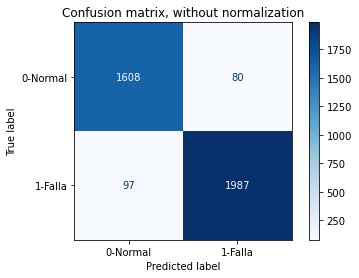

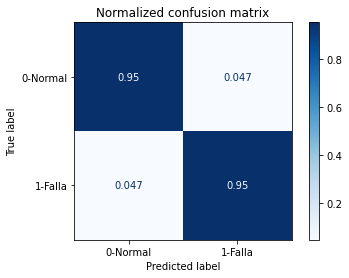

Classification Report
              precision    recall  f1-score   support

    0-Normal       0.94      0.95      0.95      1688
     1-Falla       0.96      0.95      0.96      2084

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772



In [12]:
output_recognizer = path_dataset + "model_SVM/recognizer.pickle"
output_label = path_dataset + "model_SVM/le.pickle"
embeddings_output = path_dataset + "model_SVM/embeddings.pickle"

# load the face embeddings
print("[INFO] loading face embeddings...")
data = pickle.loads(open(embeddings_output, "rb").read())
# encode the labels
print("[INFO] encoding labels...")
le = LabelEncoder()
labels = le.fit_transform(data["names"])

X_train, X_test, y_train, y_test = train_test_split(data["embeddings"], labels, random_state=0, test_size=0.5)

# train the model used to accept the 128-d embeddings of the face and
# then produce the actual face recognition
print("[INFO] training model...")
classifier = SVC(C=2.0, kernel="linear", probability=True, class_weight = 'balanced')
classifier.fit(X_train, y_train)
# write the actual face recognition model to disk
f = open(output_recognizer, "wb")
f.write(pickle.dumps(classifier))
f.close()
# write the label encoder to disk
f = open(output_label, "wb")
f.write(pickle.dumps(le))
f.close()



# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier,X_test, y_test,
                                 display_labels=np.unique(data["names"]),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


y_pred = classifier.predict(X_test)
print('Classification Report')
target_names = np.unique(data["names"])
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion matrix, without normalization
[[ 972   32]
 [  56 1204]]
Normalized confusion matrix
[[0.96812749 0.03187251]
 [0.04444444 0.95555556]]


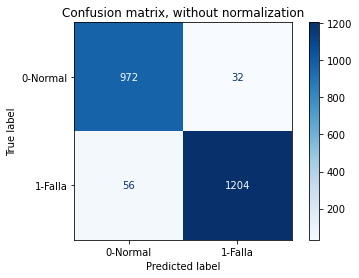

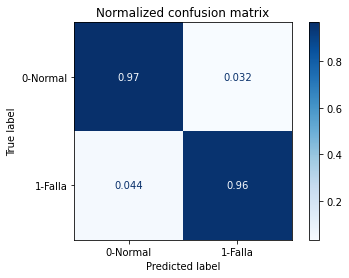

Classification Report
              precision    recall  f1-score   support

    0-Normal       0.95      0.97      0.96      1004
     1-Falla       0.97      0.96      0.96      1260

    accuracy                           0.96      2264
   macro avg       0.96      0.96      0.96      2264
weighted avg       0.96      0.96      0.96      2264



In [9]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(KNN,X_test, y_test,
                                 display_labels=np.unique(data["names"]),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

y_pred = KNN.predict(X_test)
print('Classification Report')
target_names = np.unique(data["names"])
print(classification_report(y_test, y_pred, target_names=target_names))

In [13]:
classifier.fit(X_test, y_test)
# write the actual face recognition model to disk
f = open(output_recognizer, "wb")
f.write(pickle.dumps(classifier))
f.close()




In [14]:
# load the actual face recognition model along with the label encoder
recognizer = pickle.loads(open(output_recognizer, "rb").read())
le = pickle.loads(open(output_label, "rb").read())

In [40]:
le.classes_[0]

'0-Normal'

In [38]:
prob = recognizer.predict_proba([X_train[0]])[0]
np.argmax(prob)

0

In [28]:
X_train[0].shape

(2048,)